In [1]:
"""
Created on Thu Jun 30 09:51:19 2022

@author: RKU-PL
"""

import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
import keras

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import (Activation,Conv2D,BatchNormalization, SeparableConv2D, MaxPool2D, Activation, Flatten, Dropout, Dense)
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
print(os.listdir("GC10-DET dataset\\images\\"))

SIZE = 128

['niemetaliczne_wtracenie', 'otwor', 'plama_oleju', 'pofaldowanie', 'pol_okragla_przerwa', 'porowatosc', 'spaw', 'wada_walcowania', 'wyplukanie', 'zluszczonie']


In [3]:
images = []
labels = [] 
for directory_path in glob.glob("GC10-DET dataset\\images\\*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)

GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_425391700_00025.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_425392100_00886.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_425503100_00018.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_425505100_01400.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_01_4406743300_00935.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3402617100_00366.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00147.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00148.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00150.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00152.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_3436816100_00153.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_424799200_00150.jpg
GC10-DET dataset\images\niemetaliczne_wtracenie\img_02_424799300_00850.jpg
GC10-DET dataset\i

In [4]:
images = np.array(images)
labels= np.array(labels)

In [5]:
le = LabelEncoder()
labels=le.fit_transform(labels)
labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
VGG_model = VGG16(weights='imagenet', 
                    include_top=False, 
                    input_shape=(SIZE, SIZE, 3))


In [10]:
for layer in VGG_model.layers:
	layer.trainable = False

In [11]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [12]:
with tf.device('/CPU'):
    feature_extractor=VGG_model.predict(x_train)

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
X_for_RF = features

In [ ]:
import lightgbm as lgb
model=lgb.LGBMClassifier( device='cpu',learning_rate=0.09,max_depth=-5,random_state=42)



In [ ]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
model.fit(X_for_RF, y_train,eval_set=[(X_test_features,y_test),(X_for_RF, y_train)],
          verbose=10,eval_metric='logloss')

C:\Users\robert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	training's multi_logloss: 0.479206	valid_0's multi_logloss: 0.998653
[20]	training's multi_logloss: 0.147682	valid_0's multi_logloss: 0.754254
[30]	training's multi_logloss: 0.0488873	valid_0's multi_logloss: 0.677134
[40]	training's multi_logloss: 0.0194454	valid_0's multi_logloss: 0.656718
[50]	training's multi_logloss: 0.0104656	valid_0's multi_logloss: 0.661909
[60]	training's multi_logloss: 0.00764458	valid_0's multi_logloss: 0.683472
[70]	training's multi_logloss: 0.00677154	valid_0's multi_logloss: 0.707013
[80]	training's multi_logloss: 0.00647596	valid_0's multi_logloss: 0.739702
[90]	training's multi_logloss: 0.00637645	valid_0's multi_logloss: 0.762735
[100]	training's multi_logloss: 0.00634092	valid_0's multi_logloss: 0.774981


LGBMClassifier(device='cpu', learning_rate=0.09, max_depth=-5, random_state=42)

Training set score: 0.995
Test set score: 0.820


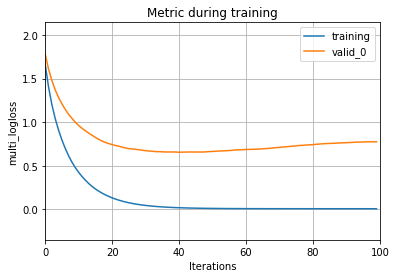

In [ ]:
lgb.plot_metric(model)
print('Training set score: {:.3f}'.format(model.score(X_for_RF, y_train)))

print('Test set score: {:.3f}'.format(model.score(X_test_features,y_test)))

In [ ]:
joblib.dump(model, 'lgb.pkl')


In [ ]:
prediction_RF_y = model.predict(X_test_features)


In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score( prediction_RF_y, y_test))
from sklearn.metrics import confusion_matrix

Accuracy =  0.8199737187910644


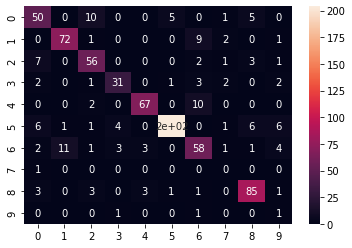

In [ ]:
cm = confusion_matrix(prediction_RF_y, y_test)
#print(cm)
sns.heatmap(cm, annot=True)
plt.show()

Predykcja:  ['plama_oleju']
Dana tabelaryczna:  plama_oleju


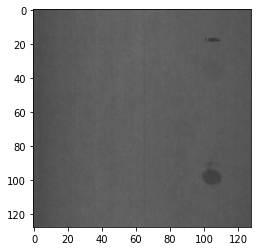

In [ ]:
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) 
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  
print("Predykcja: ", prediction_RF)
print("Dana tabelaryczna: ", le.inverse_transform(y_test)[n])

## produktowy
        

In [ ]:
from skimage import measure, io, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.color import label2rgb, rgb2gray
import numpy as np
from skimage.filters import threshold_otsu, threshold_local,threshold_minimum
import pandas as pd


In [ ]:
def estimate_prop(i):
    image = img_as_ubyte(rgb2gray(io.imread('pic'+os.sep+files[i])))
    threshold = threshold_minimum(image)
    label_image = measure.label(image < threshold, connectivity=image.ndim)
    plt.imshow(label_image)
    image_label_overlay = label2rgb(label_image, image=image)
    plt.imshow(image_label_overlay)
    plt.show()
    props = measure.regionprops_table(label_image, image, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity', 'bbox'])

    df = pd.DataFrame(props)
    df=df.sort_values(by=['area'], ascending=False)
    print(df.head())
    

In [ ]:
files=os.listdir("pic")

In [ ]:
images2=[]
for i in range(0,len(files)):
    img_path2='pic'+os.sep+files[i]
    img = cv2.imread(img_path2, cv2.IMREAD_COLOR)       
    img = cv2.resize(img, (SIZE, SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    images2.append(img)


Predykcja:  ['pofaldowanie']


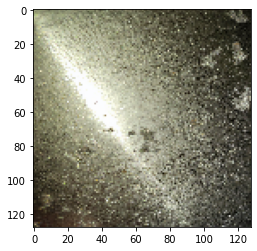

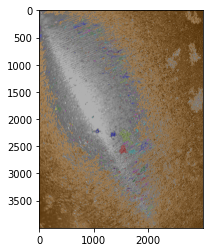

      label     area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
6         7  6913366          2966.878996       82.731543  0.577456       0   
7759   7760    28969           192.053316      111.896268  0.522246    2181   
8980   8981    12550           126.408688      109.404861  0.622891    2473   
781     782     6434            90.509796      120.061237  0.491108     222   
7921   7922     5861            86.385514      104.736222  0.775983    2227   

      bbox-1  bbox-2  bbox-3  
6          0    4000    3000  
7759    1461    2487    1735  
8980    1465    2641    1635  
781      613     355     878  
7921    1309    2330    1406  
Predykcja:  ['pofaldowanie']


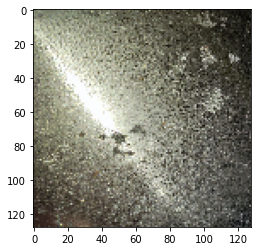

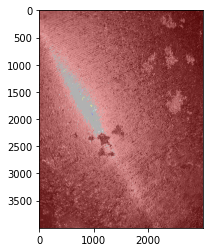

     label      area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
0        1  11599465          3843.032336      117.586516  0.966622       0   
522    523       893            33.719474      218.202688  0.781277    1735   
442    443       834            32.586528      212.010791  0.410635    1588   
611    612       822            32.351243      215.523114  0.562244    1869   
578    579       634            28.411861      230.536278  0.429539    1813   

     bbox-1  bbox-2  bbox-3  
0         0    4000    3000  
522     939    1779     978  
442     785    1658     838  
611     954    1936     992  
578    1002    1849    1060  
Predykcja:  ['spaw']


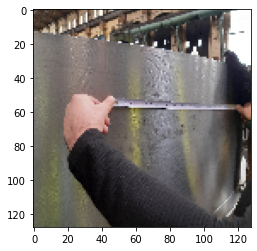

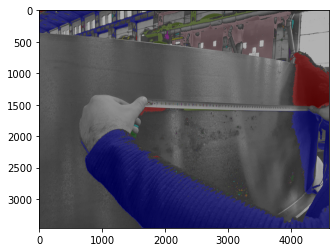

      label     area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
2171   2172  2937140          1933.825948       34.795402  0.464449    1567   
78       79   573370           854.422236       42.239486  0.682587      16   
1700   1701   383844           699.088950       31.956605  0.857574     672   
1         2   270967           587.372028       52.351759  0.391852       0   
9        10    90908           340.217079       55.817695  0.388253       0   

      bbox-1  bbox-2  bbox-3  
2171     665    3456    4608  
78      2110     774    4005  
1700    3986    1560    4608  
1          0     450    1869  
9       1781     362    3489  
Predykcja:  ['spaw']


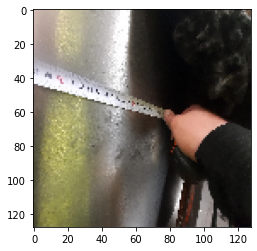

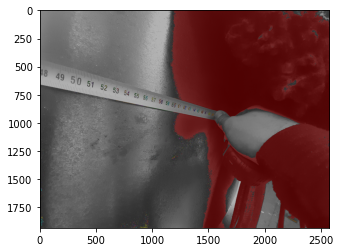

      label     area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
0         1  2083074          1628.573668       23.030429  0.806082       0   
1502   1503      645            28.657277       62.663566  0.362971    1895   
294     295      622            28.141695       45.414791  0.407869     859   
1196   1197      593            27.477828       47.288364  0.759283    1836   
1297   1298      386            22.169133       61.598446  0.478315    1863   

      bbox-1  bbox-2  bbox-3  
0       1159    1932    2576  
1502     885    1932     956  
294      964     903    1179  
1196    2196    1884    2281  
1297       0    1914      20  
Predykcja:  ['pol_okragla_przerwa']


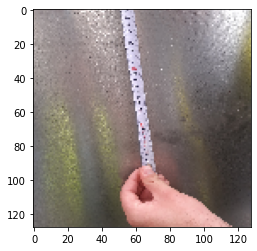

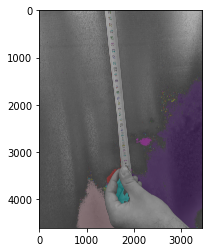

      label     area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
1115   1116  2470852          1773.692892       66.393352  0.825350    1427   
7218   7219   463662           768.344190       72.368769  0.816879    3580   
7137   7138    71492           301.705886       62.663697  0.788816    3559   
4453   4454    30862           198.228956       79.651157  0.626614    2683   
6290   6291    18804           154.732015       75.998830  0.634970    3338   

      bbox-1  bbox-2  bbox-3  
1115    1951    4608    3456  
7218     784    4608    1592  
7137    1625    4093    1908  
4453    2039    2882    2380  
6290    1419    3657    1681  
Predykcja:  ['spaw']


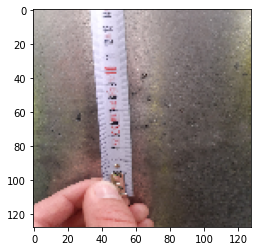

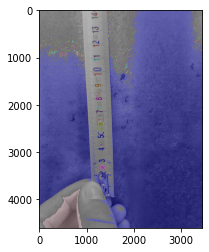

       label      area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
11        12  11135073          3765.317420       97.327719  0.760986       0   
11168  11169    360281           677.291678       93.243618  0.785129    3773   
10753  10754      7525            97.883234      119.163056  0.913339    3277   
8951    8952      7192            95.692940      125.059650  0.605031    1217   
10032  10033      6949            94.062435       81.057418  0.699587    2370   

       bbox-1  bbox-2  bbox-3  
11          0    4608    3456  
11168      74    4608     915  
10753    1280    3377    1389  
8951     1143    1295    1318  
10032    1213    2447    1381  
Predykcja:  ['spaw']


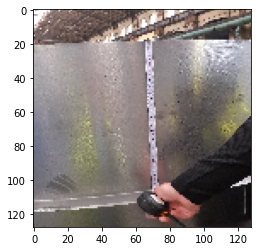

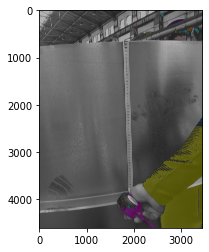

      label     area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
2512   2513  1567593          1412.770823       21.854054  0.834085    2456   
4903   4904    97079           351.574774       28.130832  0.397365    3886   
1148   1149    20024           159.672630       38.372203  0.704153     514   
335     336    14262           134.755120       34.377086  0.896925     193   
567     568     5640            84.741200       39.904433  0.740352     366   

      bbox-1  bbox-2  bbox-3  
2512    2184    4608    3456  
4903    1693    4608    2447  
1148    2834     649    3110  
335     2699     348    3080  
567     3282     498    3375  
Predykcja:  ['wyplukanie']


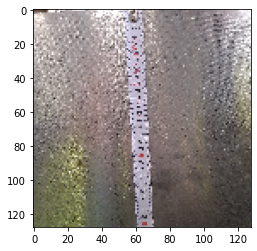

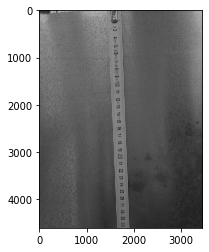

      label  area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
1024   1025   340            20.806284        2.691176  0.278689    2313   
2956   2957   330            20.498026        2.381818  0.174881    3804   
1743   1744   309            19.835096        3.012945  0.181551    2651   
2679   2680   306            19.738574        2.124183  0.165764    3514   
2464   2465   296            19.413369        2.560811  0.163085    3215   

      bbox-1  bbox-2  bbox-3  
1024    1646    2339    1722  
2956    1709    3835    1783  
1743    1661    2684    1734  
2679    1696    3543    1771  
2464    1684    3246    1759  
Predykcja:  ['pofaldowanie']


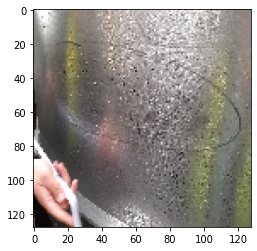

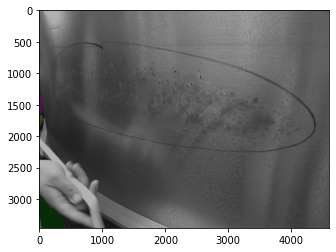

      label    area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
2504   2505  121245           392.904478       10.326611  0.963922    2939   
323     324   14819           137.361337       18.904312  0.852598    1180   
959     960    8844           106.115647       16.588082  0.728861    1650   
1765   1766     907            33.982764       14.432194  0.411338    2349   
872     873     198            15.877702       21.909091  0.611111    1594   

      bbox-1  bbox-2  bbox-3  
2504       0    3456     422  
323        0    1643      65  
959        0    1883      89  
1765       0    2376     156  
872       55    1627      70  
Predykcja:  ['spaw']


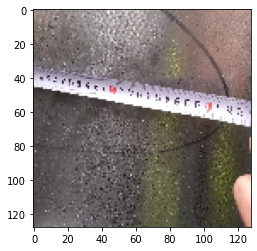

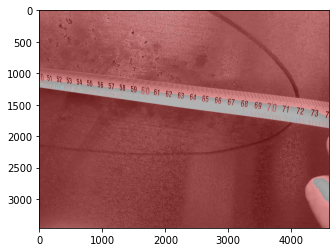

     label      area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
0        1  15033405          4375.057227      105.132684  0.943998       0   
47      48       486            24.875579      202.592593  0.556064    1147   
129    130       481            24.747287      196.565489  0.556069    1192   
878    879       409            22.820056      191.449878  0.702749    1712   
168    169       322            20.248040      198.931677  0.627680    1210   

     bbox-1  bbox-2  bbox-3  
0         0    3456    4608  
47      297    1265     327  
129     613    1310     644  
878    4250    1812    4256  
168     533    1297     558  
Predykcja:  ['spaw']


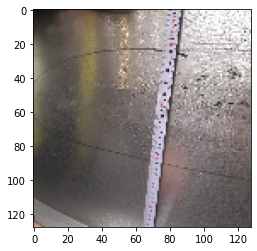

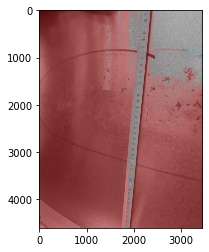

      label      area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
0         1  13196252          4099.023041      104.277795  0.868672       0   
6247   6248      7715            99.111266      153.413480  0.413252     831   
6135   6136      3127            63.098495      151.032939  0.316146     811   
3         4      2191            52.817306      170.965313  0.436107       0   
363     364      2106            51.782647      104.946819  0.522970      62   

      bbox-1  bbox-2  bbox-3  
0          0    4608    3456  
6247    3110     921    3456  
6135    2941     891    3159  
3       2007      63    2129  
363     2215     138    2283  
Predykcja:  ['spaw']


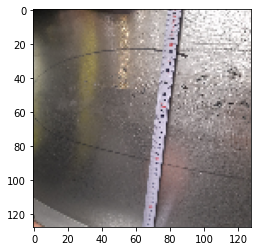

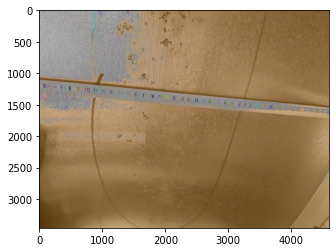

      label      area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
76       77  13194089          4098.687091      104.276200  0.868529       0   
37       38      7716            99.117689      153.413556  0.413305       0   
2344   2345      3100            62.825493      150.934516  0.313733     297   
8943   8944      2188            52.781134      170.962066  0.435510    1327   
8808   8809      2186            52.757006      116.578683  0.280508    1185   

      bbox-1  bbox-2  bbox-3  
76         0    3456    4608  
37       831     346     921  
2344     811     515     891  
8943       0    1449      63  
8808     201    1259     331  
Predykcja:  ['pofaldowanie']


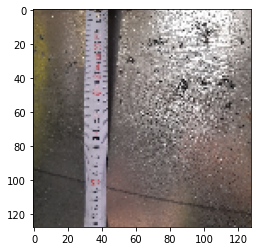

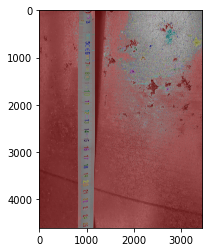

      label      area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
0         1  11378577          3806.265125       94.553207  0.744023       0   
4067   4068     25009           178.444523       83.441881  0.406578     382   
6162   6163     14579           136.244484      112.248988  0.461215     569   
2690   2691      5515            83.796874       71.988577  0.466188     259   
7141   7142      5475            83.492434       88.887854  0.524224     667   

      bbox-1  bbox-2  bbox-3  
0          0    4608    3456  
4067    2649     746    2906  
6162    3224     784    3456  
2690    2635     409    2760  
7141     974     779    1075  
Predykcja:  ['pofaldowanie']


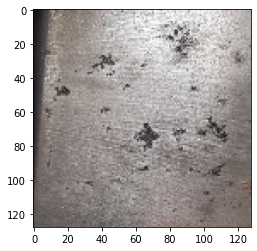

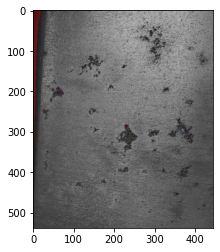

     label  area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
0        1  2724            58.892313       32.430617  0.683392       0   
63      64    39             7.046726       32.205128  0.847826     195   
90      91    27             5.863230       28.814815  0.771429     283   
146    147    19             4.918491       25.210526  0.760000     310   
89      90    19             4.918491       27.263158  0.593750     282   

     bbox-1  bbox-2  bbox-3  
0         0     365      19  
63       63     203      72  
90      227     289     235  
146     387     315     395  
89      364     288     373  
Predykcja:  ['porowatosc']


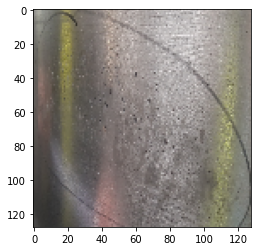

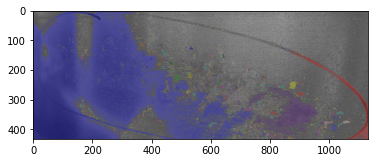

      label    area  equivalent_diameter  mean_intensity  solidity  bbox-0  \
1         2  162995           455.556451       94.236142  0.660787       0   
3775   3776   10621           116.288766      104.171264  0.484513     257   
1610   1611    4499            75.685565       95.151367  0.142558     137   
4225   4226     653            28.834449      104.483920  0.385478     277   
3292   3293     464            24.306031      103.155172  0.695652     236   

      bbox-1  bbox-2  bbox-3  
1          0     433     756  
3775     776     431     965  
1610     867     433    1131  
4225     716     323     790  
3292     862     266     892  


In [ ]:
for i in range(0, len(files)):
    input_img = np.expand_dims(images2[i], axis=0)
    input_img_feature=VGG_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = model.predict(input_img_features)[0] 
    prediction_RF = le.inverse_transform([prediction_RF])  
    print("Predykcja: ", prediction_RF)
    plt.imshow(images2[i])
    plt.show()
    estimate_prop(i)
    plt.show()

    

,label,area,equivalent_diameter,mean_intensity,solidity,bbox-0,bbox-1,bbox-2,bbox-3
76,77,13194089,4098.687091,104.276200,0.868529,0,0,3456,4608
37,38,7716,99.117689,153.413556,0.413305,0,831,346,921
2344,2345,3100,62.825493,150.934516,0.313733,297,811,515,891
8943,8944,2188,52.781134,170.962066,0.435510,1327,0,1449,63
8808,8809,2186,52.757006,116.578683,0.280508,1185,201,1259,331
...,...,...,...,...,...,...,...,...,...
394,395,1,1.128379,181.000000,1.000000,44,450,45,451
7984,7985,1,1.128379,181.000000,1.000000,985,1055,986,1056
10725,10726,1,1.128379,181.000000,1.000000,1601,692,1602,693
10726,10727,1,1.128379,181.000000,1.000000,1601,4221,1602,4222
